# hw4 Question 2

### Submitted by Vishwas Desai (visdesai) and Nrusimha Vihari Eyunni (neyunni)

In [105]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix
import pandas as pd
import time

### Dataset used: MNIST

- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker.

- This pixel-value is an integer between 0 and 255, inclusive.

- The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

In [106]:
mnist = fetch_openml("mnist_784")
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


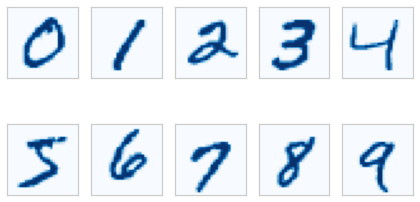

In [107]:
import matplotlib.pyplot as plt
import numpy as np


X = mnist["data"]
y = mnist["target"]
Y = y.astype(int)
X=(X/255 - 0.5)*2

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(10):
    for x, y in zip(X, Y):
        if y==i:
            img=np.array(x).reshape((28,28))
            ax[i].imshow(img, cmap="Blues")
            break
ax[0].set_yticks([])
ax[0].set_xticks([])
plt.tight_layout()
plt.show()

In [108]:
print(X.shape,Y.shape, min(Y),max(Y))

(70000, 784) (70000,) 0 9


In [109]:
# import seaborn as sns
# sns.countplot(Y)

### Splitting the dataset into train and test data having 60,000 and 10,000 images respectively

In [110]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

In [111]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

###  Scaling the data

In [112]:
from sklearn.preprocessing import StandardScaler

# Standardizing features 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
rf=RandomForestClassifier(n_jobs=-1) # n_estimators=100,  max_leaf_nodes=16, 
rf.fit(X_train,y_train)
end = time.time()


# prediction
pred=rf.predict(X_test)
len(pred)

10000

In [114]:
print(f"The Random Forest classifier took {end - start} seconds for the original data")

The Random Forest classifier took 7.354194164276123 seconds for the original data


### Overall Accuracy

In [115]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)
print(f"Overalll Accuracy: {accuracy*100} %")

Overalll Accuracy: 97.0 %


#### The overall accuracy of the Random Forest Classifier is 96.99 %

### Confusion Matrix for the MNIST data using Random Forest Classsifier 

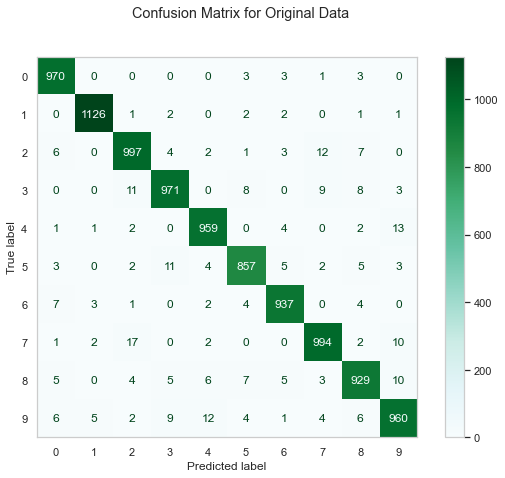

In [116]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 7))
disp =plot_confusion_matrix(rf, X_test, y_test, cmap ="BuGn", ax =ax)
disp.figure_.suptitle("Confusion Matrix for Original Data")
#plt.figure(figsize=(16,7))
plt.grid(False)
plt.show()

## The random forest classifier took ~ 8 seconds for the original data giving an accuracy of ~ 97%

# --------------------------------------------------- `PCA` ---------------------------------------------------

## Principal Component Analysis for Dimensionality Reduction

Principal Component Analysis (PCA) is an exploratory approach to reduce the data set's dimensionality to 2D or 3D, used in exploratory data analysis for making predictive models.

[Reference](https://medium.com/analytics-vidhya/principal-component-analysis-pca-with-code-on-mnist-dataset-da7de0d07c22)
[Documentaion](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

 ### 1) For variance ratio of 95 %

In [117]:
from sklearn.decomposition import PCA

pca_95 = PCA(n_components=0.95, svd_solver='full')
X_train = pca_95.fit_transform(X_train)
X_test = pca_95.transform(X_test)

In [118]:
X_train.shape, X_test.shape

((60000, 331), (10000, 331))

In [119]:
start = time.time()
rf.fit(X_train,y_train)
pred_95 = rf.predict(X_test)
end = time.time()

In [120]:
accuracy = accuracy_score(y_test, pred_95)*100
print(f"Accuracy for Variance of 95% is {accuracy} % \n")
#print("_"*100)
print(f"The Random Forest classifier took {end - start} seconds for a variance of 95%" )

Accuracy for Variance of 95% is 93.81 % 

The Random Forest classifier took 18.33980107307434 seconds for a variance of 95%


### The classifier took ~19 seconds for PCA dimensionality reduced data with variance ratio of 95% giving an accuracy of 93.8%

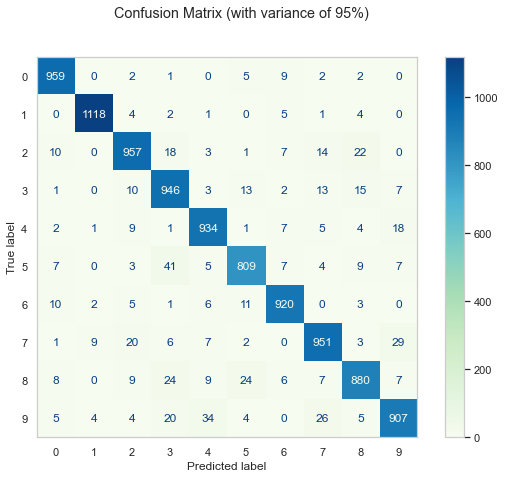

In [121]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 7))
disp =plot_confusion_matrix(rf, X_test, y_test, cmap ="GnBu", ax =ax)
disp.figure_.suptitle("Confusion Matrix (with variance of 95%)")
#plt.figure(figsize=(16,7))
plt.grid(False)
plt.show()

In [137]:
# pca_95.n_features_, pca_95.n_samples_

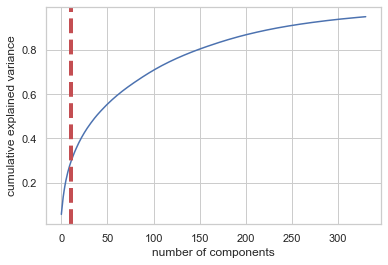

In [123]:
import seaborn as sns

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_95.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
# display(plt.show())
evr = pca_95.explained_variance_ratio_
cvr = np.cumsum(pca_95.explained_variance_ratio_)
# pca_df = pd.DataFrame()
# pca_df['Cumulative Variance Ratio'] = cvr
# pca_df['Explained Variance Ratio'] = evr
# display(pca_df.head(5))

### 2) For variance ratio of 90%

In [124]:
# PCA
pca_90 = PCA(n_components=0.90, svd_solver='full')
X_train = pca_90.fit_transform(X_train)
X_test = pca_90.transform(X_test)

# Random Forest Classifier
start = time.time()
rf.fit(X_train,y_train)
pred_90 = rf.predict(X_test)
end = time.time()

# Accuracy
accuracy_90 = accuracy_score(y_test, pred_90)*100


print(X_train.shape, X_test.shape)

(60000, 190) (10000, 190)


In [125]:
print(f"Accuracy for Variance of 95% is {accuracy_90} % \n")
print(f"The Random Forest classifier took {end - start} seconds for a variance of 90%" )

Accuracy for Variance of 95% is 94.0 % 

The Random Forest classifier took 13.395004749298096 seconds for a variance of 90%


### The classifier took ~13 seconds for PCA dimensionality reduced data with variance ratio of 90% giving an accuracy of 94%

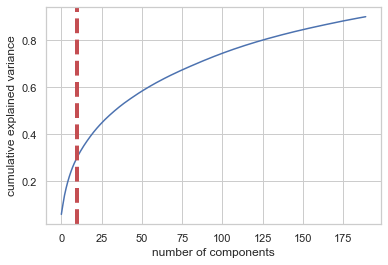

None

In [126]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_90.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_90.explained_variance_ratio_
cvr = np.cumsum(pca_90.explained_variance_ratio_)
# pca_df = pd.DataFrame()
# pca_df['Cumulative Variance Ratio'] = cvr
# pca_df['Explained Variance Ratio'] = evr
# display(pca_df.head(10))

In [138]:
# pca_90.n_features_, pca_90.n_samples_

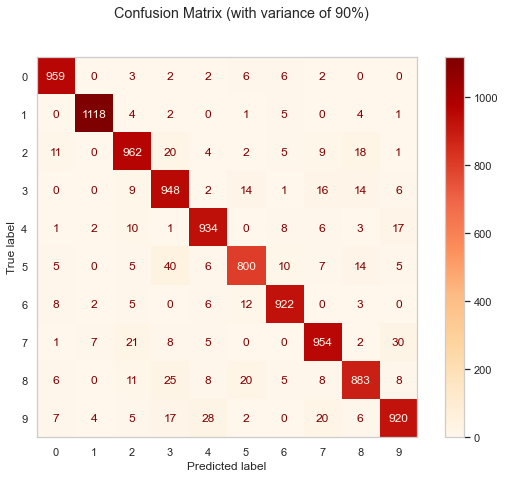

In [128]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 7))
disp =plot_confusion_matrix(rf, X_test, y_test, cmap ="OrRd", ax =ax)
disp.figure_.suptitle("Confusion Matrix (with variance of 90%)")
#plt.figure(figsize=(16,7))
plt.grid(False)
plt.show()

### 3) For variance ratio of 85%

In [129]:
# PCA
pca_85 = PCA(n_components=0.85, svd_solver='full')
X_train = pca_85.fit_transform(X_train)
X_test = pca_85.transform(X_test)

# Random Forest Classifier
start = time.time()
rf.fit(X_train,y_train)
pred_85 = rf.predict(X_test)
end = time.time()

# Confusion Matrix and Accuracy
accuracy_85 = accuracy_score(y_test, pred_85)*100


print(X_train.shape, X_test.shape)

(60000, 110) (10000, 110)


In [134]:
print(f"Accuracy for Variance of 85% is {accuracy_85} % \n")
print(f"The Random Forest classifier took {end - start} seconds for a variance of 85%" )

Accuracy for Variance of 85% is 94.6 % 

The Random Forest classifier took 10.164943218231201 seconds for a variance of 85%


### The classifier took ~10 seconds for PCA dimensionality reduced data with variance ratio of 85% giving an accuracy of 94.6%

In [139]:
# pca_85.n_features_, pca_85.n_samples_

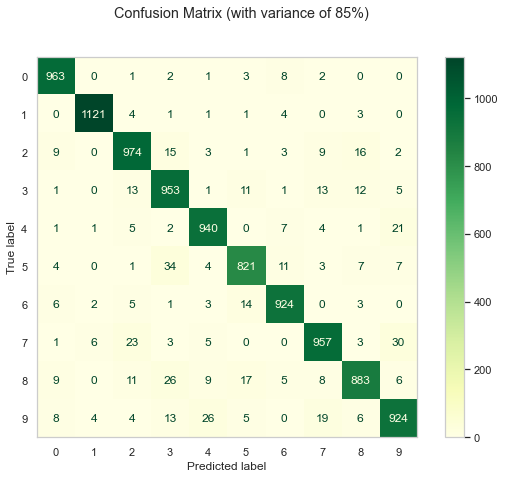

In [132]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 7))
disp =plot_confusion_matrix(rf, X_test, y_test, cmap ="YlGn", ax =ax)
disp.figure_.suptitle("Confusion Matrix (with variance of 85%)")
#plt.figure(figsize=(16,7))
plt.grid(False)
plt.show()

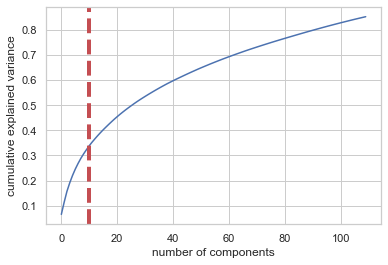

None

In [133]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_85.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_85.explained_variance_ratio_
cvr = np.cumsum(pca_85.explained_variance_ratio_)

### The random forest classifier takes 8 to 20 seconds to classify the MNIST dataset with and without applying Principal Component Analysis. Using PCA we were able to reducte the number of features from 784 to 110 having an overall accuracy of ~ 95 %

###  The differences between the trianing times for all the datasets

- We can see that the features were reduced from 768 to 331 for variance ration of 95 %. The classifier took 8 seconds to train the original data, but after applying PCA, the training time was approx. 19 seconds. ALtough the training time for PCA data should havedecreased from the original training time. but has increased in this instance which can be due to number of iterations the random forest classifier takes to find better splits of the original data.


- We can see that the features were reduced from 768 to 190 when the variance ratio was 90%. The classifier took 8 seconds to train the original data, but after applying PCA, the training time was approx. 13.3 seconds. When compared to the varaince  ratio of 95 percent, training time has decreased.


- We can see that the features were reduced from 768 to 110 when the variance ratio was 90%. The classifier took 8 seconds to train the original data, but after applying PCA, the training time was approx. 10.1 seconds. When compared to the varaince  ratio of 95% and 90%, training time has decreased conisderably.

### Accuracy and Confusion Matrix for all the datasets

- We can see that the average accuracy is 93.81 % for variance ratio of 95 percent, compared to 97 percent for the original classifier i.e without PCA. This model processed 331 features in 19 seconds versus 8 seconds for the original. This shows that after applying PCA, the classifier's output has decreased and the time required to train the model has increased.


- We can see that the average accuracy is 94 % for variance ratio of 90 percent, compared to 97 percent for the original classifier i.e. .without PCA. This model processed 190 features in 13.3 seconds versus 8 seconds for the original. This shows that after applying PCA, the classifier's output has decreased and the time required to train the model has increased.


- We can see that the average accuracy is 94.6 % for variance ratio of 85 percent, compared to 97 percent for the original classifier i.e. without PCA. This model processed 110 features in 10.1 seconds versus 8 seconds for the original. This shows that after applying PCA, the classifier's output has decreased and the time required to train the model has increased. The trainingf time for this dataset is more closer to the original than  the rest.
